In [2]:
conda install -c anaconda pandas-profiling

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - pandas-profiling


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py37_0         156 KB  anaconda
    pandas-profiling-1.4.1     |           py37_0          39 KB  anaconda
    ------------------------------------------------------------
                                           Total:         195 KB

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi                                       conda-forge --> anaconda
  conda              conda-forge::conda-4.8.3-py37hc8dfbb8~ --> anaconda::conda-4.8.3-py37_0
  pandas-profiling    conda-forge::pandas-profiling-1.4.1-0 --> anaconda::pandas-profiling-1.4.1-py37_0



certifi-2019.11.28   | 156 KB    | ##################################### | 100% 
pandas-prof

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling
import seaborn as sns

from scipy.stats import randint
from random import randint
from pandas import DataFrame
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split, cross_val_score
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFECV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, recall_score, average_precision_score, roc_auc_score, accuracy_score
from yellowbrick.classifier import PrecisionRecallCurve

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE, BorderlineSMOTE

import warnings
warnings.filterwarnings("ignore")

/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passi

# Data Anaylsis

In [5]:
df = pd.read_csv('MCI_2014_to_2019.csv')

In [6]:
df.head()
df.tail()
df.shape

,MCI,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,...,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,Division,Hood_ID,Neighbourhood,Long,Lat,ObjectId
0,Assault,-79.589356,43.758465,6371,GO-20151776190,2000-01-01T10:53:00.000Z,2015-10-15T10:53:00.000Z,Apartment,1430,100,...,1,1,Saturday,10,D23,2,Mount Olive-Silverstone-Jamestown (2),-79.589356,43.758465,6681
1,Assault,-79.532608,43.720001,16152,GO-20143243077,2000-01-01T00:00:00.000Z,2014-10-06T08:28:00.000Z,House,1430,100,...,1,1,Saturday,0,D31,23,Pelmo Park-Humberlea (23),-79.532608,43.720001,16727
2,Theft Over,-79.343628,43.707478,18847,GO-20141722881,2000-11-22T08:00:00.000Z,2014-03-18T12:35:00.000Z,Commercial,2130,210,...,22,327,Wednesday,8,D53,55,Thorncliffe Park (55),-79.343628,43.707478,18289
3,Assault,-79.220909,43.826324,19403,GO-20142047470,2000-01-01T00:00:00.000Z,2014-05-09T20:26:00.000Z,House,1430,100,...,1,1,Saturday,0,D42,131,Rouge (131),-79.220909,43.826324,19133
4,Theft Over,-79.393845,43.675167,24002,GO-20142771849,2000-08-01T12:00:00.000Z,2014-08-25T10:06:00.000Z,Other,2130,210,...,1,214,Tuesday,12,D53,95,Annex (95),-79.393845,43.675167,24211


,MCI,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,...,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,Division,Hood_ID,Neighbourhood,Long,Lat,ObjectId
206430,Assault,-79.450066,43.665993,185985,GO-2018312478,1990-02-01T00:00:00.000Z,2018-02-18T17:35:00.000Z,Apartment,1430,100,...,1,32,Thursday,0,D11,93,Dovercourt-Wallace Emerson-Junction (93),-79.450066,43.665993,185823
206431,Assault,-79.300545,43.688450,186080,GO-201949831,1996-01-01T07:29:00.000Z,2019-01-09T07:29:00.000Z,Apartment,1430,100,...,1,1,Monday,7,D54,62,East End-Danforth (62),-79.300545,43.688450,186980
206432,Break and Enter,-79.331467,43.771206,189050,GO-20181010560,1997-12-19T16:00:00.000Z,2018-06-04T12:54:00.000Z,Commercial,2120,200,...,19,353,Friday,16,D33,53,Henry Farm (53),-79.331467,43.771206,189293
206433,Assault,-79.564217,43.676842,195930,GO-2019461576,1999-01-01T00:00:00.000Z,2019-03-13T20:25:00.000Z,Apartment,1420,100,...,1,1,Friday,0,D23,7,Willowridge-Martingrove-Richview (7),-79.564217,43.676842,195791
206434,Assault,-79.564217,43.676842,195931,GO-2019461576,1999-01-01T00:00:00.000Z,2019-03-13T20:25:00.000Z,Apartment,1430,100,...,1,1,Friday,0,D23,7,Willowridge-Martingrove-Richview (7),-79.564217,43.676842,195863


(206435, 29)

In [7]:
df.describe()
df.info()
list(df)

,X,Y,Index_,ucr_code,ucr_ext,reportedyear,reportedday,reporteddayofyear,reportedhour,occurrenceyear,occurrenceday,occurrencedayofyear,occurrencehour,Hood_ID,Long,Lat,ObjectId
count,206435.000000,206435.000000,206435.000000,206435.000000,206435.000000,206435.000000,206435.000000,206435.000000,206435.000000,206435.000000,206435.000000,206435.000000,206435.000000,206435.000000,206435.000000,206435.000000,206435.000000
mean,-79.394940,43.707379,103218.000000,1696.667755,145.973953,2016.619323,15.746855,187.139933,12.838617,2016.571487,15.507976,186.470734,12.549868,72.230223,-79.394940,43.707379,103218.000000
std,0.104386,0.052718,59592.795747,323.481988,51.739660,1.717764,8.770511,103.601412,6.583508,1.829090,8.905871,103.906255,7.220263,40.758939,0.104386,0.052718,59592.795747
min,-79.639267,43.587093,1.000000,1410.000000,100.000000,2014.000000,1.000000,1.000000,0.000000,1966.000000,1.000000,1.000000,0.000000,1.000000,-79.639267,43.587093,1.000000
25%,-79.471481,43.661152,51609.500000,1430.000000,100.000000,2015.000000,8.000000,100.000000,8.000000,2015.000000,8.000000,99.000000,7.000000,36.000000,-79.471481,43.661152,51609.500000
50%,-79.393333,43.701328,103218.000000,1450.000000,100.000000,2017.000000,16.000000,189.000000,14.000000,2017.000000,16.000000,188.000000,14.000000,76.000000,-79.393333,43.701328,103218.000000
75%,-79.319374,43.752068,154826.500000,2120.000000,200.000000,2018.000000,23.000000,277.000000,18.000000,2018.000000,23.000000,276.000000,19.000000,108.000000,-79.319374,43.752068,154826.500000
max,-79.123100,43.850788,206435.000000,2135.000000,230.000000,2019.000000,31.000000,366.000000,23.000000,2019.000000,31.000000,366.000000,23.000000,140.000000,-79.123100,43.850788,206435.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206435 entries, 0 to 206434
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   MCI                  206435 non-null  object 
 1   X                    206435 non-null  float64
 2   Y                    206435 non-null  float64
 3   Index_               206435 non-null  int64  
 4   event_unique_id      206435 non-null  object 
 5   occurrencedate       206435 non-null  object 
 6   reporteddate         206435 non-null  object 
 7   premisetype          206435 non-null  object 
 8   ucr_code             206435 non-null  int64  
 9   ucr_ext              206435 non-null  int64  
 10  offence              206435 non-null  object 
 11  reportedyear         206435 non-null  int64  
 12  reportedmonth        206435 non-null  object 
 13  reportedday          206435 non-null  int64  
 14  reporteddayofyear    206435 non-null  int64  
 15  reporteddayofweek

['MCI',
 'X',
 'Y',
 'Index_',
 'event_unique_id',
 'occurrencedate',
 'reporteddate',
 'premisetype',
 'ucr_code',
 'ucr_ext',
 'offence',
 'reportedyear',
 'reportedmonth',
 'reportedday',
 'reporteddayofyear',
 'reporteddayofweek',
 'reportedhour',
 'occurrenceyear',
 'occurrencemonth',
 'occurrenceday',
 'occurrencedayofyear',
 'occurrencedayofweek',
 'occurrencehour',
 'Division',
 'Hood_ID',
 'Neighbourhood',
 'Long',
 'Lat',
 'ObjectId']

In [8]:
# the data has very few missing values --> only in occurenceyear/occurencemonth/occurenceday/
# occurencedayofyear/occurrenceydayofweek --> all less than 70 rows missing --> probably going to delete 
# them since the data set is big enough

In [9]:
#pandas_profiling.ProfileReport(df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a32d5c250>,
      dtype=object)

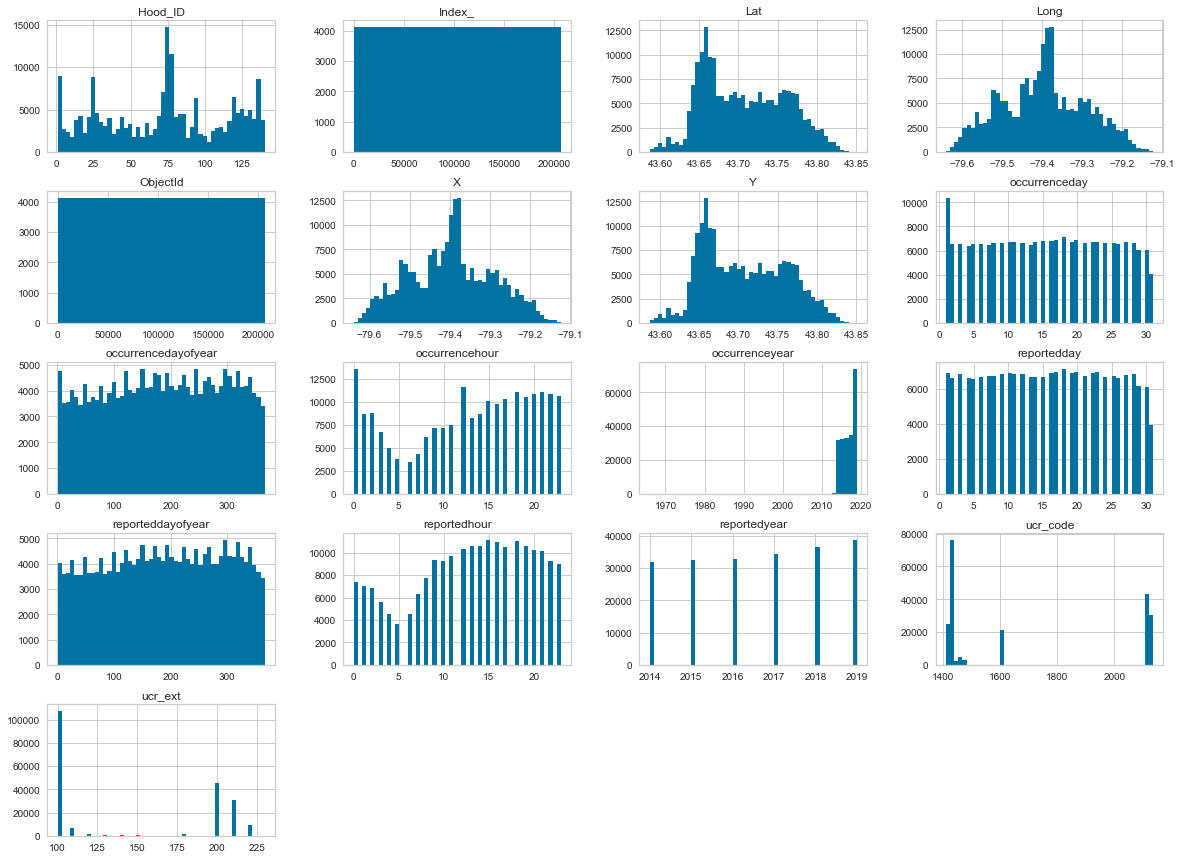

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
#save_fig("attribute_histogram_plots")
plt.show()

<Figure size 1080x720 with 0 Axes>

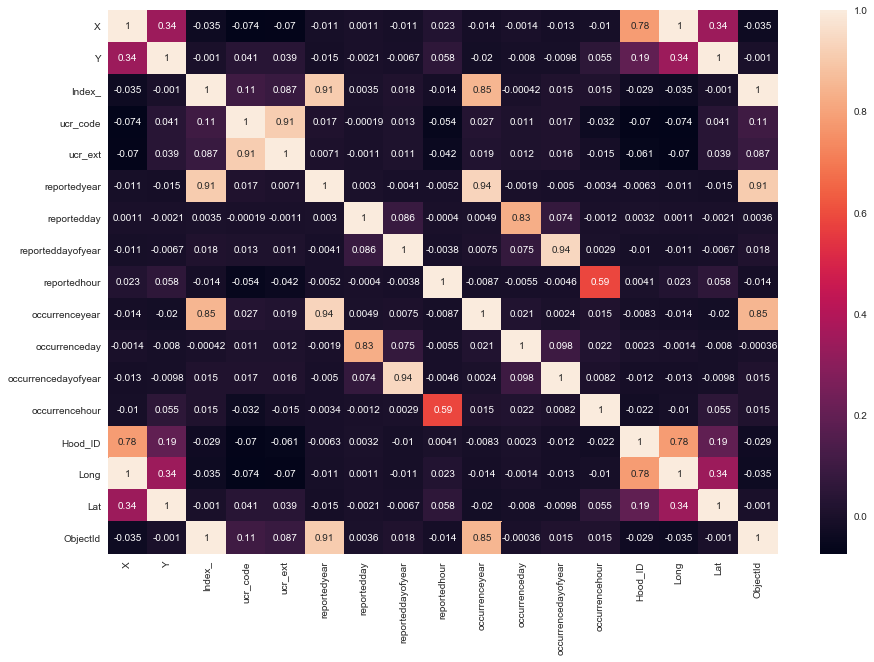

In [11]:
corr = df.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)

# Fill in Empty Cells

I did part of this in excel since we the information was all in occurencedate --> we just had to copy the data over from there into occurenceyear, occurencemonth
ALso had to convert some dates over to day of year, and the date into name of day of week ('e.g. Monday')

In [ ]:
# have a bunch of highly correlated values
# Dropping X because it's the same as latitude
# Dropping Y because it's the same as longitude
# Dropping ObjectID because it only indicates what row the crime is in the excel sheet -->not important
# Dropping Index_ because it only indicates what row the crime is in the excel sheet -->not important
# Dropping event_unique_id because it tells us nothing important about crime and is categorical
# Dropping ucr_code and ucr_ext since they are just the code versions of the offence
# Dropping Hood_ID since it's a redundancy of Neighborhood

In [ ]:
# Questions:
# What are we wanting to predict (target column) = offence or neighbordhood
# what's more important --> the reported date or offence date = i dropped the reported date and add a time difference between reported and occurenace
# I'm not sure if we should just rely on occurence day and scrap the month --> I've done this below
# Do we need to convert the occurence day to a categorical?
# i think we should drop the occurence day (1-30) and keep the occurence day of year (1-365)

In [ ]:
# https://www.publicsafety.gc.ca/cnt/rsrcs/pblctns/2015-r018/2015-r018-en.pdf
# this is the link we can use if we want to go more granular and use the UCR CODES to identify crimes in detail

In [12]:
list(df)

['MCI',
 'X',
 'Y',
 'Index_',
 'event_unique_id',
 'occurrencedate',
 'reporteddate',
 'premisetype',
 'ucr_code',
 'ucr_ext',
 'offence',
 'reportedyear',
 'reportedmonth',
 'reportedday',
 'reporteddayofyear',
 'reporteddayofweek',
 'reportedhour',
 'occurrenceyear',
 'occurrencemonth',
 'occurrenceday',
 'occurrencedayofyear',
 'occurrencedayofweek',
 'occurrencehour',
 'Division',
 'Hood_ID',
 'Neighbourhood',
 'Long',
 'Lat',
 'ObjectId']

# Preprocessing

In [ ]:
col_list = ['MCI','premisetype','occurrenceyear','occurrencedayofyear','occurrencemonth',
            'occurrencedayofweek','occurrencehour','Division','Neighbourhood']


# add back in 'offence'

#col_list = ['MCI','offence','premisetype','occurrenceyear','occurrencedayofyear','occurrencemonth',
#            'occurrencedayofweek','occurrencehour','Division','Neighbourhood']

In [ ]:
df1 = df[col_list]
df1.head()

In [ ]:
#There's some whitespace that needs to be stripped out of dataframe1 --> if we don't, one hot coding doubles up features
df1['occurrencedayofweek'] = df1['occurrencedayofweek'].str.strip()

In [ ]:
#resulting correlation map after getting rid of most features
corr = df1.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)

In [ ]:
# should we drop crime that is before 2013 --> the github does it

In [ ]:
list(df1)

# Factorize Variables --> I think One Hote Encoding Might Be Fine

crime_var = pd.factorize(df1['MCI'])
df1['MCI'] = crime_var[0]
definition_list_MCI = crime_var[1] 

premise_var = pd.factorize(df1['premisetype'])
df1['premisetype'] = premise_var[0]
definition_list_premise = premise_var[1] 

year_var = pd.factorize(df1['occurrenceyear'])
df1['occurrenceyear'] = year_var[0]
definition_list_year = year_var[1]

day_var = pd.factorize(df1['occurrencedayofyear'])
df1['occurrencedayofyear'] = day_var[0]
definition_list_day = day_var[1] 

month_var = pd.factorize(df1['occurrencemonth'])
df1['occurrencemonth'] = month_var[0]
definition_list_month = month_var[1] 

dayweek_var = pd.factorize(df1['occurrencedayofweek'])
df1['occurrencedayofweek'] = dayweek_var[0]
definition_list_dayweek = dayweek_var[1] 

hour_var = pd.factorize(df1['occurrencehour'])
df1['occurrencehour'] = hour_var[0]
definition_list_hour = hour_var[1] 

division_var = pd.factorize(df1['Division'])
df1['Division'] = division_var[0]
definition_list_division = division_var[1] 

neighbourhood_var = pd.factorize(df1['Neighbourhood'])
df1['Neighbourhood'] = neighbourhood_var[0]
definition_list_neighbourhood = neighbourhood_var[1] 

df1.head()
df1.tail()

max(df1['MCI'])

# Need To Check & Deal With Class Imbalance



# Split Dataframe into X and Y

X = df1.iloc[:,1:]
y = df1.iloc[:,0]
X.head()
y.head()

In [ ]:
X = df1.drop(['MCI'], axis=1)
y = df1['MCI']
X.head()
y.head()

# One Hot Encode Remaining Features - Instead of Factorizing

In [ ]:
#changing non-binary categories into binary
X = pd.get_dummies(X)
X.shape
X.head()

In [ ]:
# Checking here for any whitespaces or incorrect features after one hot encoding
list(X)

# Split Into Training & Testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [ ]:
X_train.head()
y_train.head()
X_test.head()
y_test.head()
X_train.shape
y_train.shape
X_test.shape
y_test.shape

# Feature Scaling

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

X_train.head()
X_test.head()

# Correlations After One Hot Encoding and Scaling

#resulting correlation map after getting rid of most features
corr = X_train.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)

# Adjusted Mutual info Score

from sklearn.metrics import adjusted_mutual_info_score

mutual_info_scores = []

#calculate each feature in X_train --> calculate the mutual info score
for feature in X_train.columns:
    
    m_info = adjusted_mutual_info_score(X_train[feature], y_train)
    
    #append it to our list
    mutual_info_scores.append(m_info)

#put the mutual info score in a dataframe
results_frame = pd.DataFrame({'feature': X_train.columns,
                             'mutual_info_scores': mutual_info_scores
                             })

mutual_info_sorted = results_frame.sort_values(by='mutual_info_scores',ascending=[False])
mutual_info_sorted = round(mutual_info_sorted,3).head(20)
mutual_info_sorted



#plots the mutual info score and features so we can find important features
plt.figure(figsize=(15,15))
plt.bar(X_train.columns, mutual_info_scores)
plt.ylabel('Mutual info shared with Target')
plt.xticks(rotation=90)
plt.plot()

# RFE Feature Selection --> Can't use this for multiclass analysis

# ROC Function

In [ ]:
def plot_roc(clf, X_test, y_test, name, ax, show_thresholds=True):
    
    y_pred_proba_clf = clf.predict_proba(X_test)[:, 1]
    # y_pred_clf = clf.predict(X_test)
    
    fpr, tpr, thr = roc_curve(y_test, y_pred_proba_clf)
    clf_ROC_AUC = roc_auc_score(y_test, y_pred_proba_clf)
    
    ax.plot(fpr, tpr, label='{}, AUC={:.2f}'.format(name, clf_ROC_AUC));
    ax.plot([0, 1], [0, 1], 'k--');
    # ax.xlim([-0.05, 1.05])
    # ax.ylim([-0.05, 1.05])
    ax.set_xlabel('False positive rate', fontsize=18);
    ax.set_ylabel('True positive rate', fontsize=18);
    ax.set_title('Receiver Operating Characteristic Curve - ROC', fontsize=18)
    ax.scatter(fpr, tpr);
    ax.legend(loc="lower right")
    ax.tick_params(axis='both', which='major', labelsize=18);
    ax.grid(True);

# Performance Metrics Function

In [ ]:
# Compute and print metrics
def get_metrics(clf, X1_test, y1_test):
    
    y_pred_prob_clf = clf.predict_proba(X1_test)[:,1]
    
    y_pred_clf = clf.predict(X1_test)
    
    # ROC_AUC = roc_auc_score(y1_test, y_pred_clf)
    
    ROC_AUC = roc_auc_score(y1_test, y_pred_prob_clf)
    
    Accuracy = accuracy_score(y1_test, y_pred_clf)
    
    cm = confusion_matrix(y1_test, y_pred_clf)
    
    tn, fp, fn, tp = confusion_matrix(y1_test, y_pred_clf).ravel()
    
    FPR = fp/(fp + tn)
    
    clf_report = classification_report(y1_test, y_pred_clf)
    
    return (ROC_AUC, Accuracy, cm, tn, fp, fn, tp, FPR, clf_report)



# Random Forest --> Don't know how to use pipelines for multiclass

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#clf_dt = DecisionTreeClassifier(random_state=42, criterion="entropy",
#                             min_samples_split=8, min_samples_leaf=8, max_depth=49, max_leaf_nodes=20)


clf_dt = DecisionTreeClassifier(random_state=42)



clf_dt.fit(X_train, y_train)

y_pred_dt = clf_dt.predict(X_test)

In [ ]:
feature_names = X.columns
class_names_dt = [str(x) for x in clf_dt.classes_]

In [ ]:
clf_dt.predict_proba(X_test);
clf_dt.predict(X_test);

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_dt, target_names=class_names_dt))

# One Vs. All

In [ ]:
print('Original dataset shape %s' % Counter(y))

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))
